In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from IPython.display import set_matplotlib_formats

warnings.filterwarnings("ignore")
set_matplotlib_formats('svg')
sns.set_style(style="darkgrid")

In [3]:
import geojson
with open("polish_geography.geojson") as f:
    gj = geojson.load(f)

In [4]:
df = pd.json_normalize(gj["features"])[["geometry.coordinates", "properties.name", "properties.population"]]
df.head()

,geometry.coordinates,properties.name,properties.population
0,"[18.445995, 54.071752]",Skarszewy,7082
1,"[18.203053, 54.133217]",Nowa Karczma,792
2,"[18.15901, 54.118653]",Lubań,1000
3,"[18.123258, 54.123342]",Będomin,150
4,"[18.056115, 54.12514]",Mały Klincz,308


In [5]:
df.shape

(11510, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11510 entries, 0 to 11509
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   geometry.coordinates   11510 non-null  object
 1   properties.name        11510 non-null  object
 2   properties.population  11510 non-null  object
dtypes: object(3)
memory usage: 269.9+ KB


In [7]:
for i in range(df.shape[0]):
    row = df.iloc[i, :]
    try:
        int(row["properties.population"])
    except:
        print("-"*20)
        print(i)
        print(row["properties.population"])

--------------------
3200
1616 (2011 r.)
--------------------
4092
ok. 250
--------------------
9305
12 266
--------------------
10398
blisko ponad 150 osób


In [8]:
df.iloc[3200, 2] = 1616
df.iloc[4092, 2] = 250
df.iloc[9305, 2] = 12_266
df.iloc[10398, 2] = 150

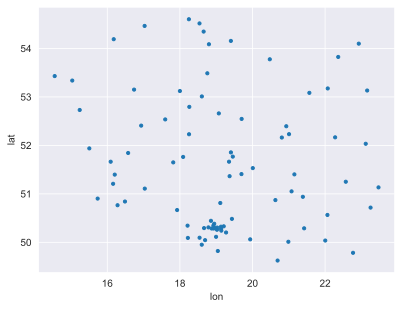

In [18]:
threshold = 50_000
(df
 .rename(columns={"geometry.coordinates":   "coordinates",
                   "properties.name":       "name",
                   "properties.population": "population"})
 .assign(lon=lambda x: [coord[0] for coord in x["coordinates"]]) 
 .assign(lat=lambda x: [coord[1] for coord in x["coordinates"]])
 .drop(["coordinates"], axis=1)
 .astype({"population": np.int32,
          "lon":        np.float32,
          "lat":        np.float32})
 .sort_values(["population"], ascending=False)
 .query("population>@threshold")
 .plot(kind="scatter", x="lon", y="lat", s=10)

)
plt.show()

In [18]:
pd.read_csv("/Users/stawager/Downloads/LUDN_2137_CTAB_20231226132505.csv", delimiter=";")

,Kod,Nazwa,ogółem;ogółem;2022;[osoba],ogółem;mężczyźni;2022;[osoba],ogółem;kobiety;2022;[osoba],0-4;ogółem;2022;[osoba],0-4;mężczyźni;2022;[osoba],0-4;kobiety;2022;[osoba],5-9;ogółem;2022;[osoba],5-9;mężczyźni;2022;[osoba],...,80-84;ogółem;2022;[osoba],80-84;mężczyźni;2022;[osoba],80-84;kobiety;2022;[osoba],85 i więcej;ogółem;2022;[osoba],85 i więcej;mężczyźni;2022;[osoba],85 i więcej;kobiety;2022;[osoba],0-14;ogółem;2022;[osoba],0-14;mężczyźni;2022;[osoba],0-14;kobiety;2022;[osoba],Unnamed: 65
0,201011,Bolesławiec (1),37293,17388,19905,1460,752,708,1611,801,...,965,288,677,1020,282,738,4845,2492,2353,NaN
1,201022,Bolesławiec (2),15176,7584,7592,760,412,348,917,477,...,206,69,137,187,50,137,2664,1385,1279,NaN
2,201032,Gromadka (2),5059,2519,2540,226,113,113,259,121,...,89,30,59,117,27,90,758,379,379,NaN
3,201043,Nowogrodziec (3),14680,7331,7349,721,368,353,874,475,...,263,88,175,227,51,176,2421,1269,1152,NaN
4,201052,Osiecznica (2),7307,3687,3620,349,191,158,408,199,...,108,38,70,116,33,83,1200,612,588,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,3218043,Resko (3),7325,3690,3635,308,147,161,340,183,...,123,25,98,163,36,127,1072,545,527,NaN
2473,3218053,Węgorzyno (3),6360,3198,3162,274,148,126,299,139,...,123,39,84,141,32,109,929,478,451,NaN
2474,3261011,Koszalin (1),104239,49043,55196,4134,2127,2007,4812,2472,...,2641,931,1710,2867,786,2081,14092,7282,6810,NaN
2475,3262011,Szczecin (1),391566,185520,206046,16518,8517,8001,17788,9165,...,9306,3273,6033,10141,2879,7262,52563,27027,25536,NaN
